<h2>Exoplanet Prediction Using Kepler Labelled Time Series Data With Machine Learning Algorithms</h2>
<strong><i>Author: Mesuga, Reymond R.</i></strong><br>
<a href="https://github.com/Rey-commits" target="_blank">GitHub</a> | <a href="https://www.linkedin.com/in/reymond-r-21410/" target="_blank">LinkedIn</a> | <a href="https://rey-commits.web.app/" target="_blank">Website</a>

![](https://astrobiology.nasa.gov/uploads/filer_public_thumbnails/filer_public/e0/99/e0994f77-66cf-460f-8de3-fe95a2b78a97/keplerslideshow.jpg__1240x510_q85_crop_subsampling-2.jpg)

<strong>About the Dataset</strong><br>
The dataset used in this project was gathered from a Kaggle Repository entitled <a href="https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data">Exoplanet Hunting in Deep Space</a> which was polished and published by <a href="https://github.com/winterdelta">Winter Delta (WΔ)</a>. The dataset are derived from the observations made by NASA Kepler space telescope.

The data describe the change in flux (light intensity) of several starts. Each star has a binary label of `1` or `2`. The star that have at least one confirmed exoplanet are labeled as `2`. Otherwise, the label is `1`.

Planets themeselves do not emit light, but the starts that they orbit do. If the said start is watched over several months or years, there may be a regular "dimming" of the flux (light intensity). This is evidence that there may be an orbiting around the star; such a start could be considered to be `candidate` system.

![](https://www.nasa.gov/sites/default/files/images/656348main_ToV_transit_diag_full.jpg)

The figure above shows a good demonstration on how potential candidate system are predicted. The rotation of the planet around the star affect its light intensiy over time resulting to a change in flux.  

<strong>Installing the Required Libraries</strong>

In [1]:
!pip install pandas numpy plotly matplotlib seaborn --quiet

In [3]:
!pip install opendatasets scikit-learn --quiet --upgrade

<strong>Importing the Required Libraries</strong>

In [4]:
import plotly.express as px
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<strong>Downloading the Data</strong><br>
The dataset is available at https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data .


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [5]:
od.download("https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data")

  0%|          | 0.00/55.9M [00:00<?, ?B/s]

100%|██████████| 55.9M/55.9M [00:49<00:00, 1.18MB/s]


The dataset contains two file namely `exoTrain.csv` and `exoTest.csv.`

In [6]:
os.listdir("kepler-labelled-time-series-data")

['exoTrain.csv', 'exoTest.csv']

Obviously, `exoTrain.csv` is the training set. However, i would like to make a new data frame for validation set which will be gathered from a portion of training set. That's why i name its variable as `train_val_df`.

In [7]:
train_val_df = pd.read_csv("kepler-labelled-time-series-data/exoTrain.csv")
test_df = pd.read_csv("kepler-labelled-time-series-data/exoTest.csv")

In [8]:
train_val_df

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0         2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1         2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2         2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3         2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4         2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   
...     ...      ...      ...      ...      ...      ...      ...     ...   
5082      1   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   
5083      1   989.75   891.01   908.53   851.83   755.11   615.78  595.77   
5084      1   273.39   278.00   261.73   236.99   280.73   264.90  252.92   
5085      1     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85   
5086      1   323.28   306.36   293.16   287.67   249.89   218.30  188.86   

       FLUX.8  FLUX.9  FLUX.10  FLUX.11  FLUX.12  FLUX.13  FLUX.14  FLUX.15  \
0      -96.27  -79.89  -160.17  -207.47  -154.88  -173.71  -146.56  -120.26   
1      -85.33  -83.97   -73.38   -86.51   -74.97   -73.15   -86.13   -76.57   
2      486.39  436.56   484.39   469.66   462.30   492.23   441.20   483.17   
3      311.31  312.42   323.33   311.14   326.19   313.11   313.89   317.96   
4    -1022.71 -989.57  -970.88  -933.30  -889.49  -888.66  -853.95  -800.91   
...       ...     ...      ...      ...      ...      ...      ...      ...   
5082   -49.25  -30.92   -11.88    -4.85     3.88    16.85    26.54    36.70   
5083   458.87  492.84   384.34   288.95   257.42   208.06   224.73   160.31   
5084   254.88  237.60   238.51   225.68   199.75   177.53   211.27   190.35   
5085    -0.03    3.28     6.29    -4.33     5.12    -2.24    -3.27    -7.51   
5086   178.93  118.93   130.68   104.50    63.03    72.07   198.89   570.46   

      FLUX.16  FLUX.17  FLUX.18  FLUX.19  FLUX.20  FLUX.21  FLUX.22  FLUX.23  \
0     -102.85   -98.71   -48.42   -86.57    -0.84   -25.85   -67.39   -36.55   
1      -61.27   -37.23   -48.53   -30.96    -8.14    -5.54    15.79    45.71   
2      481.28   535.31   554.34   562.80   540.14   576.34   551.67   556.69   
3      330.92   341.10   360.58   370.29   369.71   339.00   336.24   319.31   
4     -754.48  -717.24  -649.34  -605.71  -575.62  -526.37  -490.12  -458.73   
...       ...      ...      ...      ...      ...      ...      ...      ...   
5082    36.93    38.64    57.02    59.46    78.27   101.61    75.40   115.64   
5083    53.22    61.89    91.62    15.27    -4.70     9.75    37.20    46.91   
5084   226.61   204.55   222.45   204.51   196.45   130.41   155.12   108.21   
5085    -4.22    -0.82    -1.34    -6.76    -9.87    -2.18     6.43    -6.42   
5086   208.08    26.42    44.18    39.85    71.55    81.54    48.87    61.10   

      FLUX.24  FLUX.25  FLUX.26  FLUX.27  FLUX.28  FLUX.29  FLUX.30  FLUX.31  \
0      -87.01   -97.72  -131.59  -134.80  -186.97  -244.32  -225.76  -229.60   
1       10.61    40.66    16.70    15.18    11.98  -203.70    19.13    19.13   
2      550.86   577.33   562.08   577.97   530.67   553.27   538.33   527.17   
3      321.56   308.02   296.82   279.34   275.78   289.67   281.33   285.37   
4     -447.76  -419.54  -410.76  -404.10  -425.38  -397.29  -412.73  -446.49   
...       ...      ...      ...      ...      ...      ...      ...      ...   
5082   130.04   148.42   190.33   203.23   234.36   272.32   299.24   279.73   
5083    43.00    55.41   175.08   133.64   218.98   277.05   270.98   112.98   
5084    92.93    99.46    76.12    73.34    29.25    10.76    22.68    46.29   
5085    -6.75    -3.84    -0.56    -5.66    -4.30    -7.31    -5.81   -11.12   
5086    49.82    38.50    28.64    20.10    15.07    33.55    36.00   -29.34   

      FLUX.32  FLUX.33  FLUX.34  FLUX.35  FLUX.36  FLUX.37  FLUX.38  FLUX.39  \
0     -253.48  -145.74  -145.74    30.47  -173.39  -187.56  -192.88  -182.76   
1       19.13    19.13    19.13    17.02    -8.50 

In [9]:
test_df

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7  \
0        2   119.88   100.21    86.46    48.68    46.12    39.39    18.57   
1        2  5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39   
2        2   844.48   817.49   770.07   675.01   605.52   499.45   440.77   
3        2  -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22   
4        2   -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   
..     ...      ...      ...      ...      ...      ...      ...      ...   
565      1   374.46   326.06   319.87   338.23   251.54   209.84   186.35   
566      1    -0.36     4.96     6.25     4.20     8.26    -9.53   -10.10   
567      1   -54.01   -44.13   -41.23   -42.82   -39.47   -24.88   -31.14   
568      1    91.36    85.60    48.81    48.69    70.05    22.30    11.63   
569      1  3071.19  2782.53  2608.69  2325.47  2089.37  1769.56  1421.09   

      FLUX.8   FLUX.9  FLUX.10  FLUX.11  FLUX.12  FLUX.13  FLUX.14  FLUX.15  \
0       6.98     6.63   -21.97   -23.17   -29.26   -33.99    -6.25   -28.12   
1    5569.47  5550.44  5458.80  5329.39  5191.38  5031.39  4769.89  4419.66   
2     362.95   207.27   150.46    85.49   -20.12   -35.88   -65.59   -15.12   
3    -746.50  -709.53  -679.56  -706.03  -720.56  -631.12  -659.16  -672.03   
4     -45.20    -5.04    14.62   -19.52   -11.43   -49.80    25.84    11.62   
..       ...      ...      ...      ...      ...      ...      ...      ...   
565   167.46   135.45   107.28    95.81    78.93    86.46    78.54    88.59   
566    -4.54   -11.55   -10.48   -19.06   -18.59   -22.66   -24.26   -24.22   
567   -24.71   -13.12   -14.78   -13.55   -10.72   -18.62    -7.90    -7.65   
568    37.86    28.27    -4.36    10.24   -10.75    -5.26   -37.81     2.25   
569  1142.09   902.31   714.47   547.28   418.19   243.19   202.78   123.84   

     FLUX.16  FLUX.17  FLUX.18  FLUX.19  FLUX.20  FLUX.21  FLUX.22  FLUX.23  \
0     -27.24   -32.28   -12.29   -16.57   -23.86    -5.69     9.24    35.52   
1    4218.92  3924.73  3605.30  3326.55  3021.20  2800.61  2474.48  2258.33   
2      16.60   -25.70    61.88    53.18    64.32    72.38   100.35    67.26   
3    -665.06  -667.94  -660.84  -672.75  -644.91  -680.53  -620.50  -570.34   
4       3.18    -9.59    14.49     8.82    32.32   -28.90   -28.90   -14.09   
..       ...      ...      ...      ...      ...      ...      ...      ...   
565    41.51    51.28   102.65   108.90    69.54    83.50    32.09    64.06   
566   -32.34   -28.79   -39.34   -46.62   -46.25   -44.37   -50.59   -55.80   
567    -0.22     7.78    -0.22   -12.68   -12.69     4.38   -10.19    -4.42   
568   -36.31    -8.40   -14.20   -37.67   -32.72    35.61    57.47    94.94   
569     0.44  -122.94   118.91  -185.06  -119.35   101.65   103.12   366.09   

     FLUX.24  FLUX.25  FLUX.26  FLUX.27  FLUX.28  FLUX.29  FLUX.30  FLUX.31  \
0      81.20   116.49   133.99   148.97   174.15   187.77   215.30   246.80   
1    1951.69  1749.86  1585.38  1575.48  1568.41  1661.08  1977.33  2425.62   
2      14.71   -16.41  -147.46  -231.27  -320.29  -407.82  -450.48  -146.99   
3    -530.00  -537.88  -578.38  -532.34  -532.38  -491.03  -485.03  -427.19   
4     -30.87   -18.99   -38.60   -27.79     9.65    29.60     7.88    42.87   
..       ...      ...      ...      ...      ...      ...      ...      ...   
565    67.07    19.60    48.39    59.93    18.03    83.06    83.40   -70.29   
566   -62.28   -64.81   -63.29   -67.64   -66.05   -62.19   -60.25   -64.50   
567    -5.79    -2.00     4.39    -6.10    -2.84    -6.49    -6.31     0.04   
568    86.89    65.85    93.39    36.88    53.91    44.60   -41.26   -26.69   
569   259.44   288.72   548.72   485.94   474.25   653.09   734.09   343.03   

     FLUX.32  FLUX.33  FLUX.34  FLUX.35  FLUX.36  FLUX.37  FLUX.38  FLUX.39  \
0     -56.68   -56.68   -56.68   -52.05   -31.52   -31.15   -48.53   -38.93   
1    2889.61  3847.64  3847.64  3741.20  3453.47  3202.61  2923.73  2694.84

<strong>Informations About the Data</strong>

In [11]:
train_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 13.9 MB


The dataset seems to have no missing values.

## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries.

<strong>Light Intensity of Stars With Exoplanet Over Time</strong>

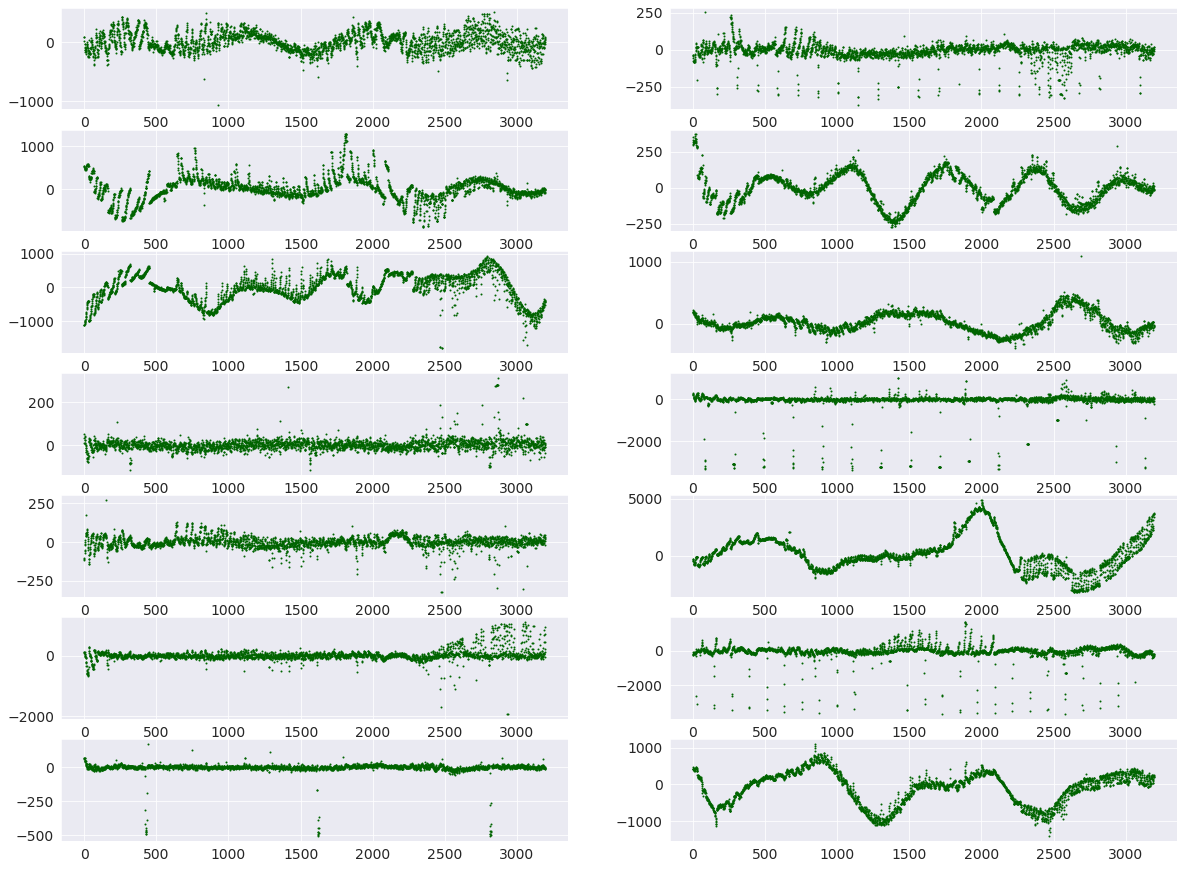

In [56]:
fig = plt.figure(figsize=(20,40))
for i in range(14):
    plot = fig.add_subplot(18,2,i+1)
    plot.scatter(np.arange(3197),train_val_df[train_val_df["LABEL"]==2].iloc[i,1:],s=1, c="darkgreen")

<strong>Light Intensity of Stars Without Exoplanet Over Time</strong>

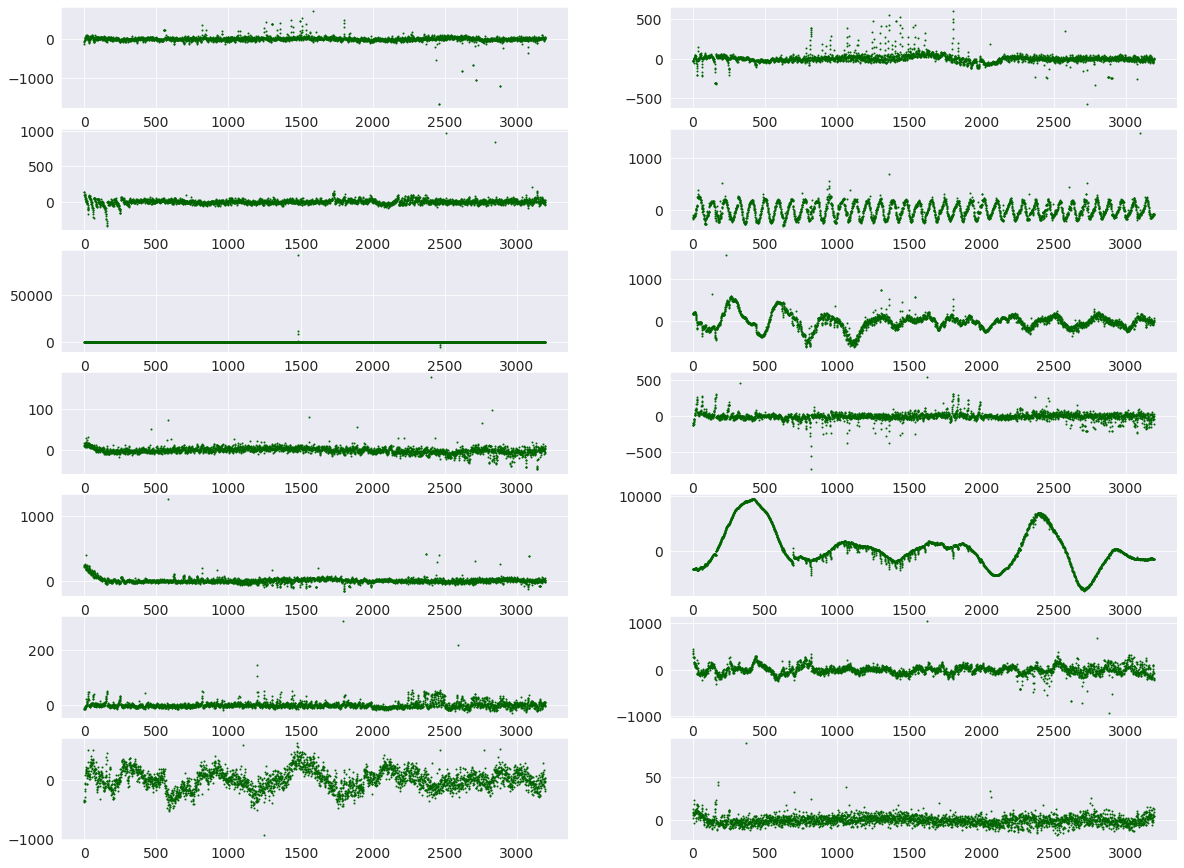

In [57]:
fig = plt.figure(figsize=(20,40))
for i in range(14):
    plot = fig.add_subplot(18,2,i+1)
    plot.scatter(np.arange(3197),train_val_df[train_val_df["LABEL"]==1].iloc[i,1:],s=1, c="darkgreen")

As observed on the above visualizations, starts with conformed expolanet often exhibits fluctuations on its light intensity. On the other hand, some of the stars without exoplanet exhibit also this kind of fluctuation but not very often as the starts with exoplanet.

<AxesSubplot:title={'center':'No. of Stars With(2) and Without(1) Exoplanet'}, xlabel='LABEL', ylabel='count'>

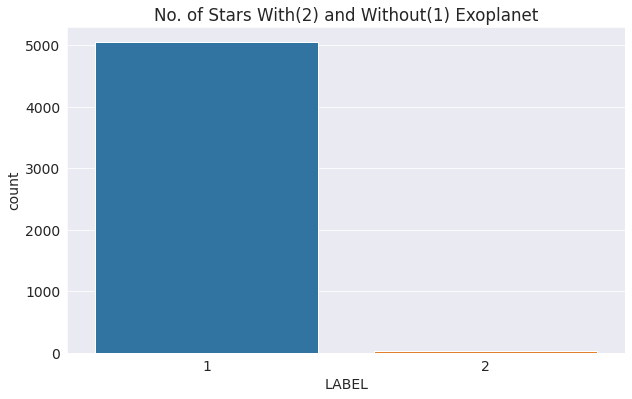

In [60]:
plt.title("No. of Stars With(2) and Without(1) Exoplanet")
sns.countplot(x=train_val_df["LABEL"])

There is a huge imbalance on the number of stars with and without exoplanet.